# Naive Bayes Classifier
Naive Bayes is very simple, yet powerful algorithm for classification. It is based on Bayes
Theorem with an assumption of independence among predictors. It assumes that the presence
of a feature in a class is unrelated to any other feature.

# Bayes theorem
Bayes theorem describes the probability of an event, based on prior knowledge of conditions
that might be related to the event.

Given a Hypothesis ($H$) and evidence ($E$), Bayes’ Theorem states that the relationship between
the probability of the hypothesis before getting the evidence, $P(H)$, and the probability
of the hypothesis after getting the evidence, $P(H|E)$, is:
$$P(H\mid E) = \frac{P(E\mid H)P(H)}{P(E)}$$
* $P(H)$ is called the prior probability,
* $P(H|E)$ is called the posterior probability,
* $P(H|E)/P(E)$ is called the likelihood ratio.
* $P(H)$ and $P(E)$ are the probabilities of $H$ occurring and $E$ occurring independently of each
other.

## Example 1
We’re testing for a rare disease, where 1\% of the population is infected. We have a highly sensitive and specific test:
99\% of sick patients test positive, and 99\% of healthy patients test negative

Given that a patient tests positive, what is the probability that the patient is actually sick?

A naive answer would be: Imagine that we have $100\times 100 = 10 000$ representative people.
Thus 100 would be sick and 9900 healthy. After running our test on them 99 sick people would have test result as sick and 99 healthy would test sick as well. We’re equally likely to be healthy or sick when the test would result with positive outcome.

Given events $x$ and $y$, there’s a relationship between the probabilities of either event (denoted $P(x)$ and $P(y)$), the joint probabilities (both happen, which is denoted $P(x,y)$), and conditional probabilities (event $x$ happens given $y$ happens, denoted $P(x|y)$).

$$P(sick) = 0.01; \quad P(+|sick)=0.99; \quad P(+|\neg  sick) = 0.01$$
so
$$
P(sick|+) = \frac{P(+|sick)P(sick)}{P(+)} = \frac{0.99\cdot 0.01}{0.99\cdot 0.01+0.01\cdot 0.99} = 0.5
$$


## Example 2

In [1]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
X_train , X_test , y_train , y_test = train_test_split (
    dataset.data, dataset.target , test_size=0.4 , random_state =4)

In [2]:
model = GaussianNB ()
model.fit(X_train , y_train)

GaussianNB()

In [3]:
expected = y_test
predicted = model.predict(X_test)

In [4]:
print(metrics.classification_report(expected, predicted ))
print(metrics.confusion_matrix(expected, predicted ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.89      1.00      0.94        17
           2       1.00      0.89      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

[[25  0  0]
 [ 0 17  0]
 [ 0  2 16]]


## Task 1
Given the training data in the table below (Tennis data with some numerical attributes),
without using sklearn library, predict the class of the following new example using Naïve
Bayes classification:

outlook=overcast, temperature=60, humidity=62, windy=false


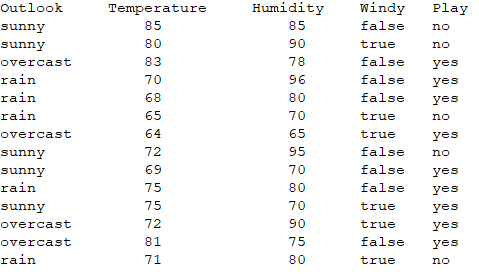

In [5]:
# https://gist.github.com/bjuliano/5e25ee0728d454c5f88d41f69cd9016e
# Convert sklearn.Bunch to pandas.DataFrame
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# Load the nominal WEATHER dataset from https://www.openml.org/
weather = datasets.fetch_openml(name='weather', version=2)
print('Features:',   weather.feature_names)
print('Target(s):',  weather.target_names)
print('Categories:', weather.categories)

df = pd.DataFrame( np.c_[weather.data, weather.target],
                   columns=np.append(weather.feature_names, weather.target_names) )
print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Features: ['outlook', 'temperature', 'humidity', 'windy']
Target(s): ['play']
Categories: None
     outlook temperature humidity windy play
0      sunny          85       85  True   no
1      sunny          80       90  True   no
2   overcast          83       86  True  yes
3      rainy          70       96  True  yes
4      rainy          68       80  True  yes
5      rainy          65       70  True   no
6   overcast          64       65  True  yes
7      sunny          72       95  True   no
8      sunny          69       70  True  yes
9      rainy          75       80  True  yes
10     sunny          75       70  True  yes
11  overcast          72       90  True  yes
12  overcast          81       75  True  yes
13     rainy          71       91  True   no


In [45]:
df['temperature'] = df['temperature'].astype('float')
df['humidity'] = df['humidity'].astype('float')

In [71]:
import pandas as pd
import numpy as np

class BayesianClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}
        self.classes = []

    def fit(self, X, y):
        self.classes, class_counts = y.value_counts().index.tolist(), y.value_counts().values.tolist()
        total_samples = len(y)

        for class_label, count in zip(self.classes, class_counts):
            self.class_probs[class_label] = count / total_samples

        for feature_column in X.columns:
            feature_type = X[feature_column].dtype

            for class_label in self.classes:
                feature_class_values = X[feature_column][y == class_label]

                if feature_type == 'object':  # Categorical feature
                    feature_probs = self.calculate_categorical_probabilities(feature_class_values)
                else:  # Continuous feature
                    feature_probs = self.calculate_continuous_probabilities(feature_class_values)

                feature_idx = X.columns.get_loc(feature_column)
                if feature_idx not in self.feature_probs:
                    self.feature_probs[feature_idx] = {}
                self.feature_probs[feature_idx][class_label] = feature_probs

    def predict(self, X):
        predictions = []

        for _, sample in X.iterrows():
            max_posterior = float('-inf')
            predicted_class = None
            for class_label in self.classes:
                posterior = np.log(self.class_probs[class_label])
                for feature_column, feature_value in sample.iteritems():
                    feature_idx = X.columns.get_loc(feature_column)

                    if feature_idx in self.feature_probs:
                        feature_type = X[feature_column].dtype
                        if feature_type == 'object':  # Categorical feature
                            if feature_value in self.feature_probs[feature_idx][class_label]:
                                posterior += np.log(self.feature_probs[feature_idx][class_label][feature_value])
                            else:
                                # Smoothing for unseen categorical values
                                posterior += np.log(1e-6)
                        else:  # Continuous feature
                            mu, sigma = self.feature_probs[feature_idx][class_label]
                            posterior += np.log(self.calculate_continuous_probability(feature_value, mu, sigma))
                if posterior > max_posterior:
                    max_posterior = posterior
                    predicted_class = class_label
            predictions.append(predicted_class)
        return predictions

    def calculate_categorical_probabilities(self, feature_values):
        unique_values, counts = feature_values.value_counts().index.tolist(), feature_values.value_counts().values.tolist()
        prob_dict = {}
        total_count = len(feature_values)
        for val, count in zip(unique_values, counts):
            prob_dict[val] = count / total_count
        return prob_dict

    def calculate_continuous_probabilities(self, feature_values):
        mu = feature_values.mean()
        sigma = feature_values.std()
        return mu, sigma

    def calculate_continuous_probability(self, x, mu, sigma):
        return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

    def predict(self, X):
      predictions = []

      for _, sample in X.iterrows():
          max_posterior = float('-inf')
          predicted_class = None
          for class_label in self.classes:
              posterior = np.log(self.class_probs[class_label])
              for feature_column, feature_value in sample.items():
                  feature_idx = X.columns.get_loc(feature_column)

                  if feature_idx in self.feature_probs:
                      feature_type = X[feature_column].dtype
                      if feature_type == 'object' or feature_type == 'bool':  # Categorical feature
                          if feature_value in self.feature_probs[feature_idx][class_label]:
                              posterior += np.log(self.feature_probs[feature_idx][class_label][feature_value])
                          else:
                              # Smoothing for unseen categorical values
                              posterior += np.log(1e-6)
                      else:  # Continuous feature
                          mu, sigma = self.feature_probs[feature_idx][class_label]
                          posterior += np.log(self.calculate_continuous_probability(feature_value, mu, sigma))
              if posterior > max_posterior:
                  max_posterior = posterior
                  predicted_class = class_label
          predictions.append(predicted_class)
      return predictions


In [72]:
clf = BayesianClassifier()
clf.fit(df.drop('play', axis=1), df['play'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   outlook      14 non-null     object 
 1   temperature  14 non-null     float64
 2   humidity     14 non-null     float64
 3   windy        14 non-null     object 
 4   play         14 non-null     object 
dtypes: float64(2), object(3)
memory usage: 688.0+ bytes


In [74]:
# new example outlook=overcast, temperature=60, humidity=62, windy=false
example = pd.DataFrame([['overcast', 60, 62, False]], columns=weather.feature_names)
example

,outlook,temperature,humidity,windy
0,overcast,60,62,False


In [75]:
clf.predict(example)

['yes']

## Task 2
Without using sklearn library, write a python script that will perform an n-fold ($n > 2$) cross-validation for naive-bayes classifier on iris data set.

Than calculate accuracy, precision, recall and F-measure.

In [80]:
# make n-fold classification with BayesianClassifier class on iris dataset


dataset = datasets.load_iris()
X_train , X_test , y_train , y_test = train_test_split (
    dataset.data, dataset.target , test_size=0.4 , random_state =4)

# split data into n folds
n = 10
X_folds = np.array_split(X_train, n)
y_folds = np.array_split(y_train, n)

# train and test n times
acc =[]
prec = []
rec = []
f1 = []

for i in range(n):
    # make train and test sets
    X_train = np.concatenate(X_folds[:i] + X_folds[i+1:])
    X_test  = np.array(X_folds[i])
    y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
    y_test  = np.array(y_folds[i])

    # make df from train and test sets
    df_train = pd.DataFrame( np.c_[X_train, y_train],
                                columns=np.append(dataset.feature_names, 'target') )
    df_test  = pd.DataFrame( np.c_[X_test,  y_test],
                                columns=np.append(dataset.feature_names, 'target') )

    # make model and predict
    model = BayesianClassifier()
    model.fit(X = df_train.drop(columns=['target']), y = df_train['target'])
    predicted = model.predict(X = df_test.drop(columns=['target']))

    # calculate metrics
    acc.append( metrics.accuracy_score(y_test, predicted) )
    prec.append( metrics.precision_score(y_test, predicted, average='macro') )
    rec.append( metrics.recall_score(y_test, predicted, average='macro') )
    f1.append( metrics.f1_score(y_test, predicted, average='macro') )

# print metrics
print('Accuracy:', np.mean(acc))
print('Precision:', np.mean(prec))
print('Recall:', np.mean(rec))
print('F1:', np.mean(f1))

Accuracy: 0.9444444444444444
Precision: 0.9486111111111111
Recall: 0.96
F1: 0.9474651274651273
